In [4]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd

# PDG packages
import pdgstaging
import pdgraster

### Configure the stager

In [22]:
# define the .json file that configures the stager
# another option is to include .json code directly into this function, works the same 
config = '/home/jcohen/sample_data/ingmar-config.json'
stager = pdgstaging.TileStager(config)

### Explore the files within the lake_change.gpkg file

In [8]:
base_dir = '/home/pdg/data/nitze_lake_change/data_sample_2022-09-09/32607/05_Lake_Dataset_Raster_02_final/'
file = 'lake_change.gpkg'
lakes = gpd.read_file(base_dir + file)
lakes.head(3)
#lakes.shape
# there are 31,596 lakes in this geodataframe
# 18 variables such as "net change in ha" and "net change percentage"

,label_id,id,Area_start_ha,Area_end_ha,NetChange_ha,NetChange_perc,GrossIncrease_ha,GrossIncrease_perc,GrossDecrease_ha,GrossDecrease_perc,StableWater_ha,Perimeter_meter,Orientation_degree,Solidity_ratio,Eccentricity_ratio,ChangeRateNet_myr-1,ChangeRateGrowth_myr-1,geometry
0,5,5,3.2400,2.8260,-0.4140,-12.777777,0.0504,1.555556,0.4644,16.433121,2.7756,668.345238,14.492468,0.653846,0.968097,-0.309720,0.037705,"POLYGON ((396630.000 7782540.000, 396660.000 7..."
1,6,6,1.4850,1.4886,0.0036,0.242424,0.0711,4.787879,0.0675,4.534462,1.4175,348.639610,176.485802,0.937500,0.883279,0.005163,0.101968,"POLYGON ((396990.000 7782510.000, 397080.000 7..."
2,9,9,3.5748,3.3498,-0.2250,-6.294058,0.0837,2.341390,0.3087,9.215476,3.2661,885.624458,145.381869,0.714286,0.878298,-0.127029,0.047255,"POLYGON ((396840.000 7782120.000, 396900.000 7..."


<AxesSubplot: >

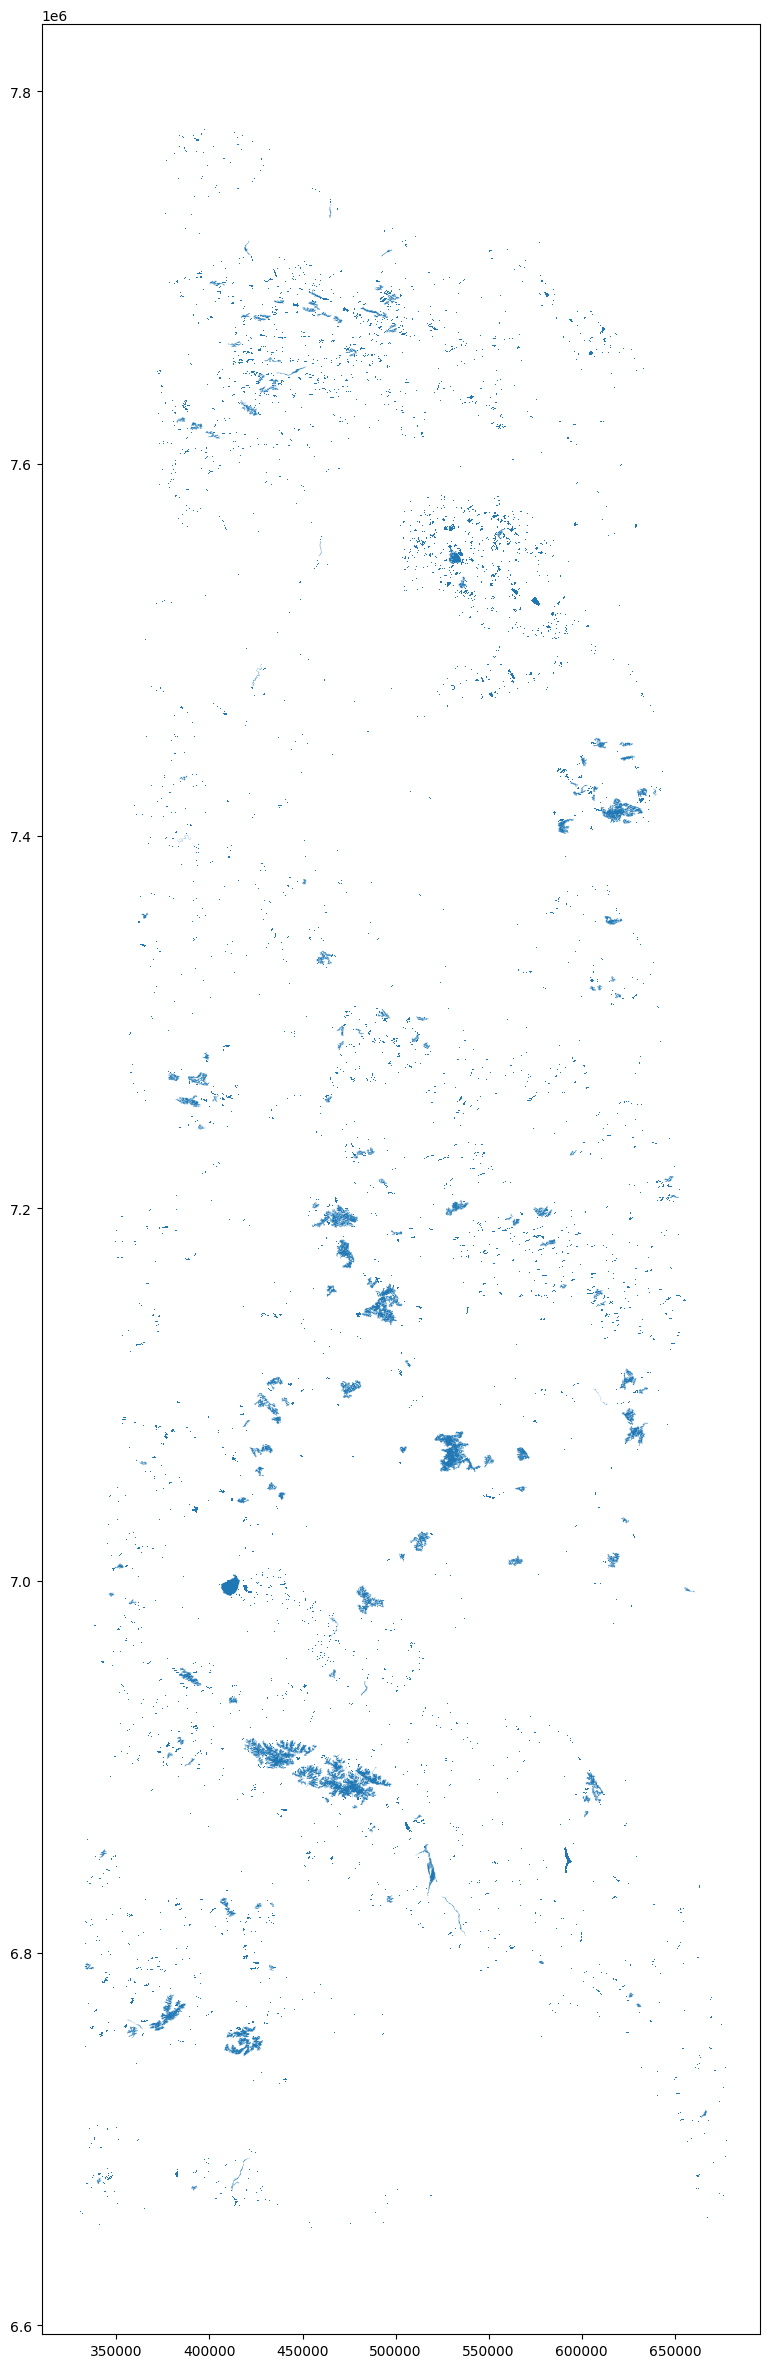

In [11]:
# plot a sample of the lakes
lakes.sample(10000).plot(figsize = (30,30))

### Execute the stager on all lake polygons within the lake_change.gpkg file

In [ ]:
# for staging multiple files:
# stager.stage_all(insert-data-dir)

# stage the lake change data to convert them to tiles, which then will be converted into rasters
stager.stage(base_dir + file)
# took 5 min 45 sec

By staging the files using the stager we configured with the .json script, we created a directory of the tiles in a deliberate hierarchial structure. Each layer of the directory is as follows:
- **staged**: base folder for all tiles (lakes)
- **WorldCRS84Quad**: the tile matrix set grid, which is in geographic coordinates, allowing the tiles to appear square when represented on the 3D Globe on the PDG web portal (in Cesium format)
- **11**: style (number of zoom levels? the "z-range")
- **numbered subfolders, for example 406-481**: tile matrix (x)
- **numbered tiles, for example 228.gpkg:** tile column (y)

See [here](https://github.com/PermafrostDiscoveryGateway/viz-staging/blob/main/docs/tile_path_structure.md) for a schematic of this hierarchial directory

<AxesSubplot: >

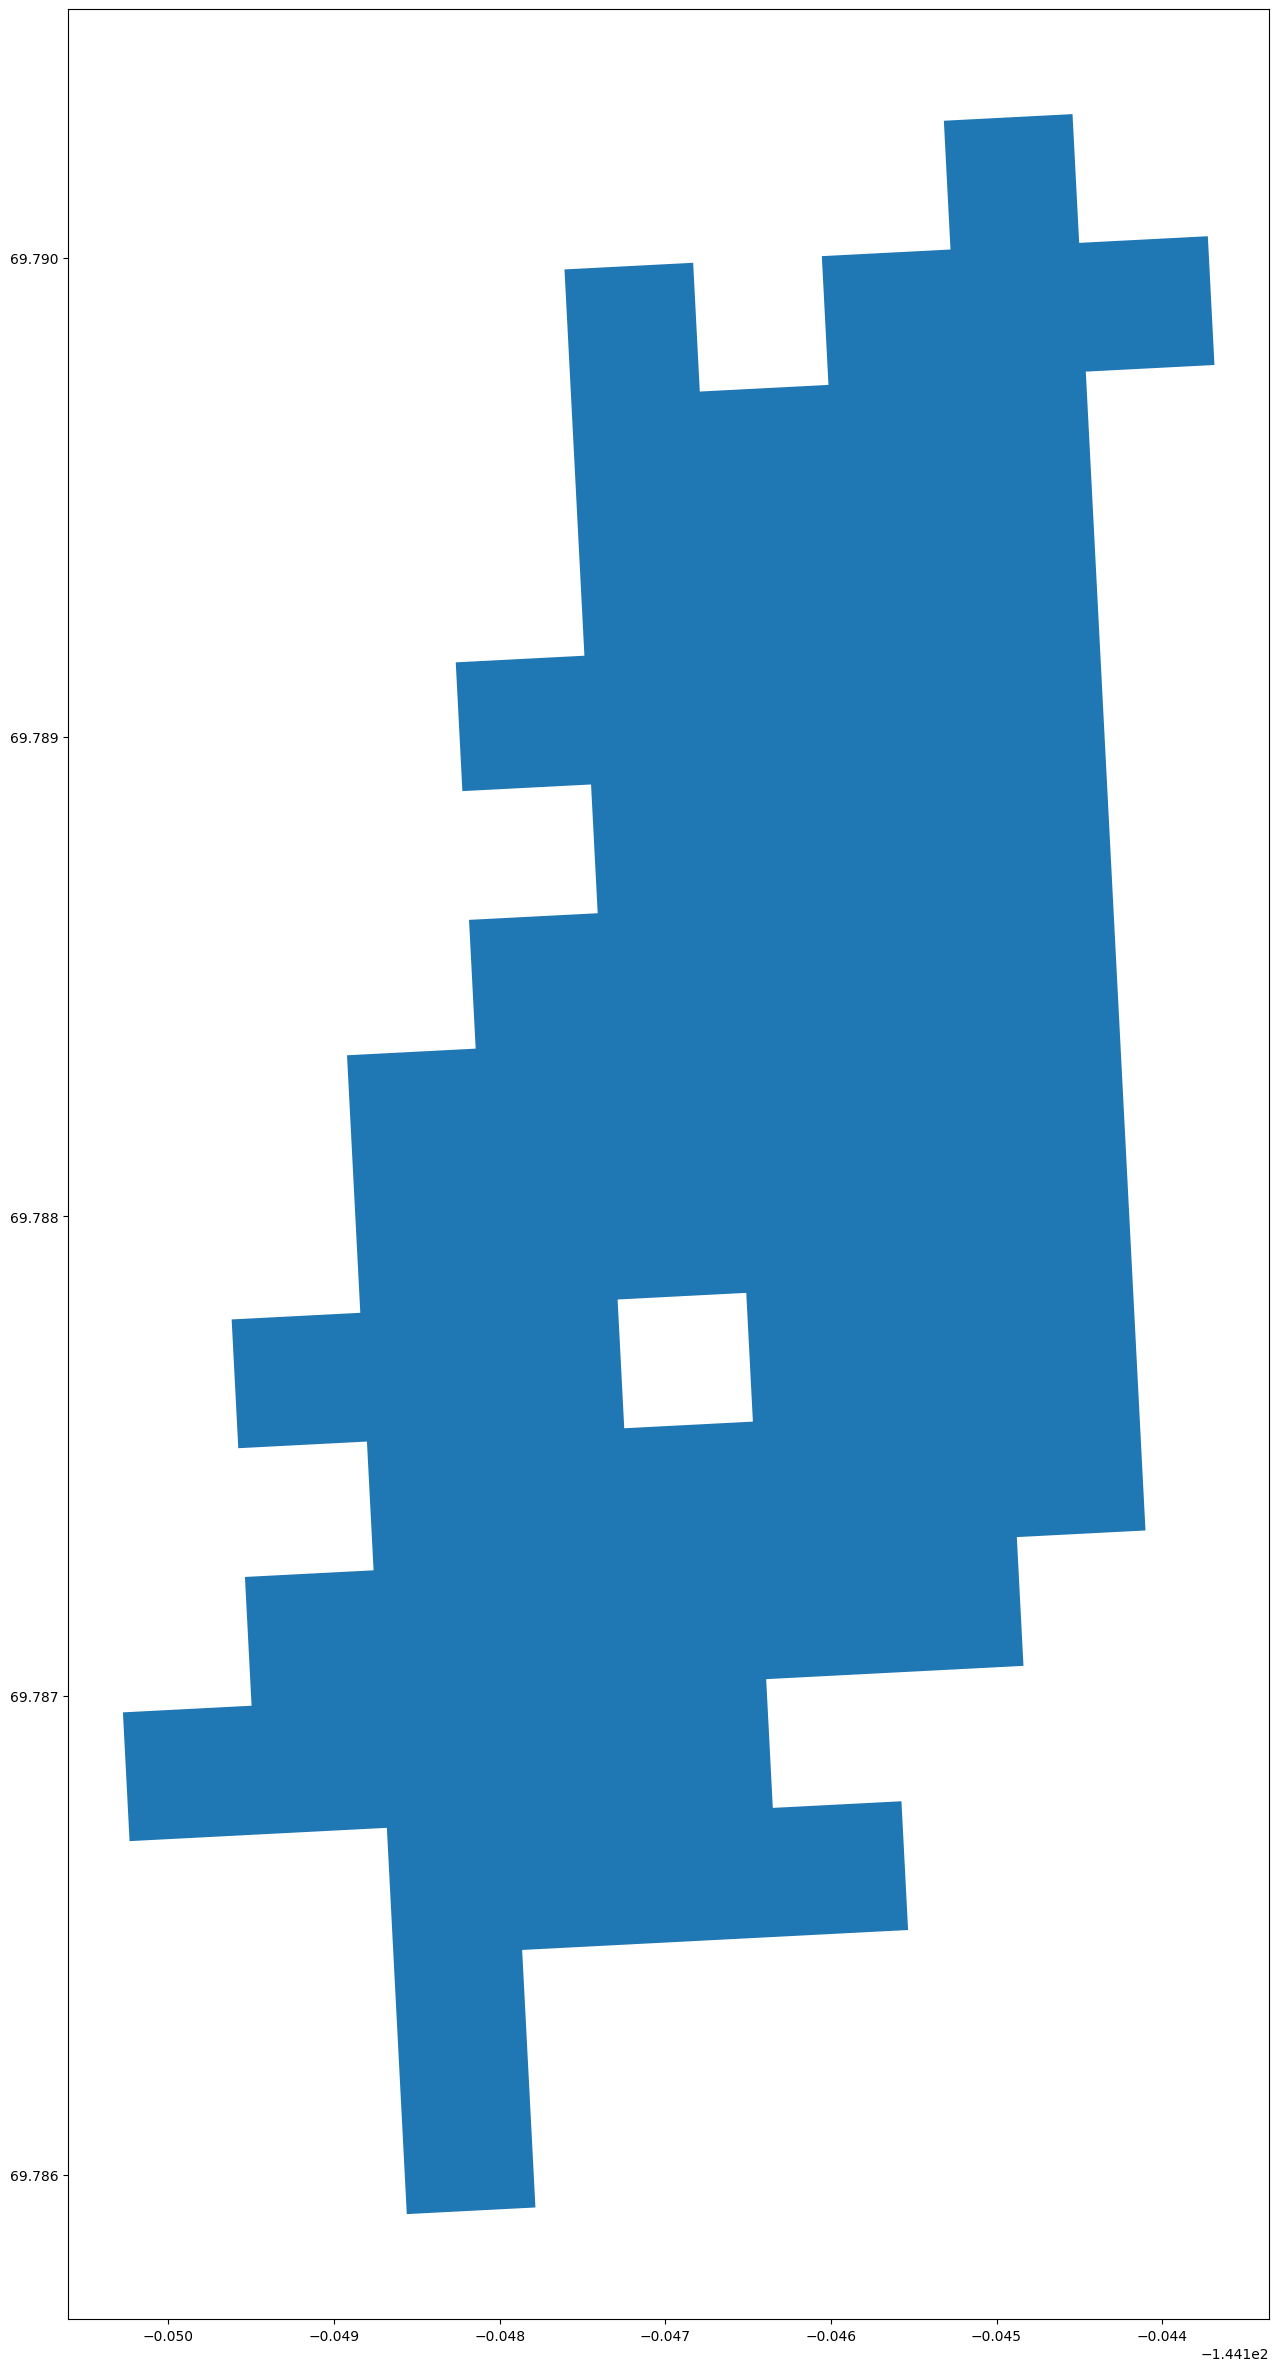

In [13]:
# visualize one tile (one lake)
tile_dir = '/home/jcohen/sample_data/staged/WorldCRS84Quad/11'
tile_example = '/407/229.gpkg' # tile matrix (x) and tile column (y)
tile = gpd.read_file(tile_dir + tile_example)
tile.plot(figsize = (30,30))

### Rasterize the tiles

Convert the tiled vectors into a series of GeoTIFFs at a range of zoom levels

In [23]:
# define the .json file that configures the rasterizer
rasterizer = pdgraster.RasterTiler(config)
# rasterize all files
rasterizer.rasterize_all()

/home/jcohen/anaconda3/envs/pdgviz/lib/python3.10/site-packages/pdgraster/WebImage.py:110: RuntimeWarning: divide by zero encountered in double_scalars
  (255 / (max_val - min_val))
/home/jcohen/anaconda3/envs/pdgviz/lib/python3.10/site-packages/pdgraster/WebImage.py:110: RuntimeWarning: divide by zero encountered in double_scalars
  (255 / (max_val - min_val))
/home/jcohen/anaconda3/envs/pdgviz/lib/python3.10/site-packages/pdgraster/WebImage.py:110: RuntimeWarning: divide by zero encountered in double_scalars
  (255 / (max_val - min_val))
/home/jcohen/anaconda3/envs/pdgviz/lib/python3.10/site-packages/pdgraster/WebImage.py:110: RuntimeWarning: divide by zero encountered in double_scalars
  (255 / (max_val - min_val))
/home/jcohen/anaconda3/envs/pdgviz/lib/python3.10/site-packages/pdgraster/WebImage.py:110: RuntimeWarning: divide by zero encountered in double_scalars
  (255 / (max_val - min_val))
/home/jcohen/anaconda3/envs/pdgviz/lib/python3.10/site-packages/pdgraster/WebImage.py:110:

For the above code chunk to run, I had to make an edit to the 'palette' argument in the .json config file. I was getting an error with the "palette": "blue_medb717b" part (in 2 places) so I replaced it with just 1 color (?) and it ran. This is something to bring up with Robyn in order to better understand the configuration .json doc. I think it is probably something to do with a package I have to download in order to use the default palette in the .json document.